Base

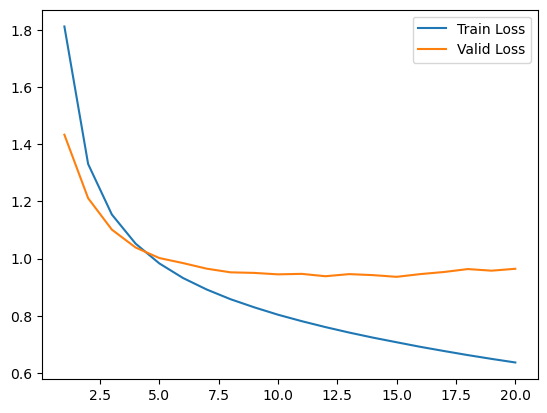

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\testing.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Observation: Validation loss stop improves at early stage while training loss keeps on impoving -> Overfitting
Solution:

(1) Regularization -> Considering using Adam optimizer, this might not be the best solution

(2) Dropout

(3) Reduce Model Complexity

(4) Early stopping

Adding dropout to the model

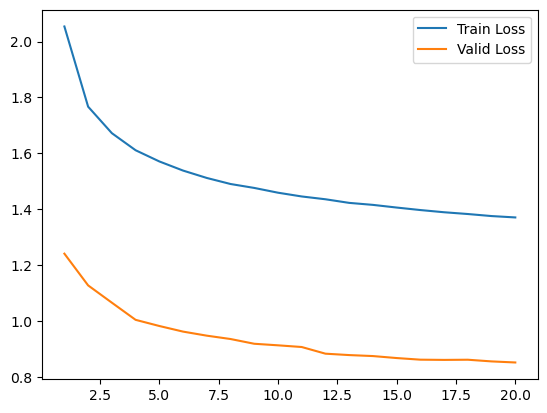

In [7]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\ReLU_dropout_Batchnorm_originaldim.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Set both train/validation stage to train mode

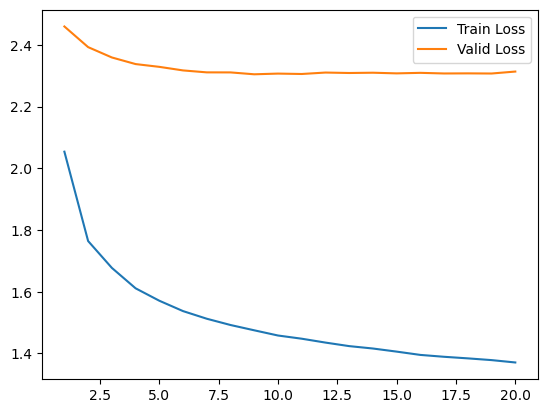

In [9]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\ReLU_dropout_Batchnorm_originaldim_train_train_mode.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

(Guess) The drop out layer causes the validation loss to be lower than training loss, which is impossible for a successful training. Maybe increasing the dimension of each layer can solve this 
because the feature become more diversified?

Test: Model1

        nn.Linear(429, 2048), #1
        nn.ReLU(),
        nn.BatchNorm1d(2048),
        nn.Dropout(0.2),

        nn.Linear(2048, 2048), #2
        nn.ReLU(),
        nn.BatchNorm1d(2048),
        nn.Dropout(0.2),

        nn.Linear(2048, 2048), #3
        nn.ReLU(),
        nn.BatchNorm1d(2048),
        nn.Dropout(0.2),

        nn.Linear(2048, 39), #4
        nn.ReLU(),
        nn.BatchNorm1d(39),
        nn.Dropout(0.2),

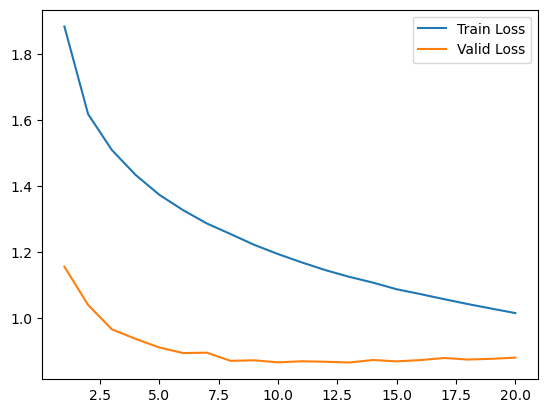

In [12]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Try some online model:

    nn.Linear(429, 2048), # 1
    nn.LeakyReLU(),
    #nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048, 2048), # 2
    nn.LeakyReLU(),
    #nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048, 2048), # 2
    nn.LeakyReLU(),
    #nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048,1024), # 3
    nn.LeakyReLU(),
    #nn.ReLU(),
    nn.BatchNorm1d(1024),
    nn.Dropout(0.5),
    nn.Linear(1024, 512), # 4
    #nn.ReLU(),
    nn.LeakyReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),
    nn.Linear(512, 256), # 5
    #nn.ReLU(),
    nn.LeakyReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256, 39)     



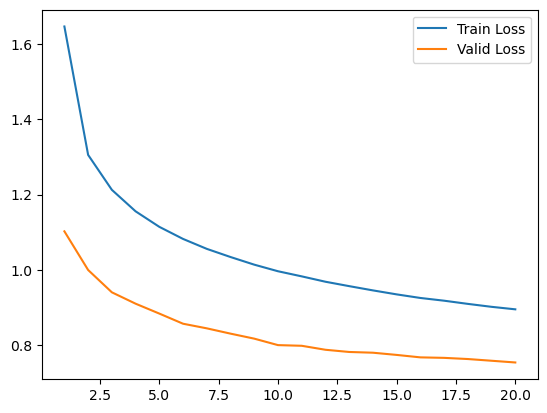

In [13]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model2.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Maybe increasing the batch size could solve this issue? since the result of validation set is averaged over the batch

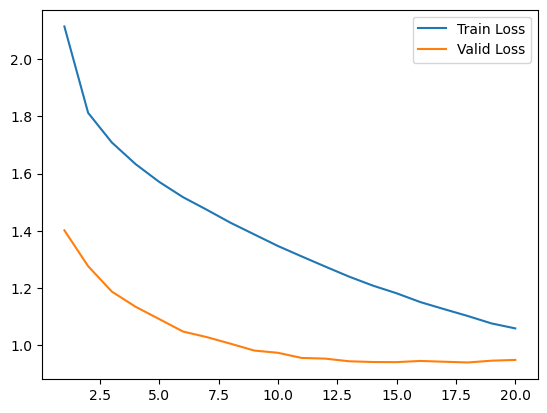

In [14]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1_batchsize_64to2048.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Above is the result of model1 with batch size increased from 64 to 2038. Not solving the issue, and small batch size is better for optimization and traing. Removing dropout layer now.

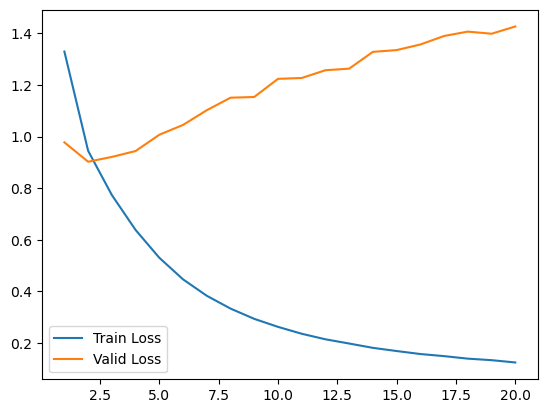

In [15]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model3.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

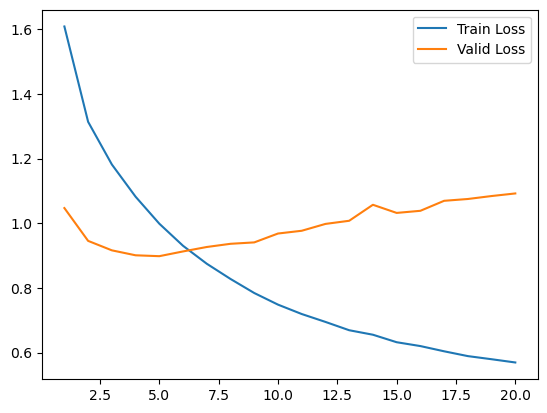

In [16]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1_dropout0.1.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

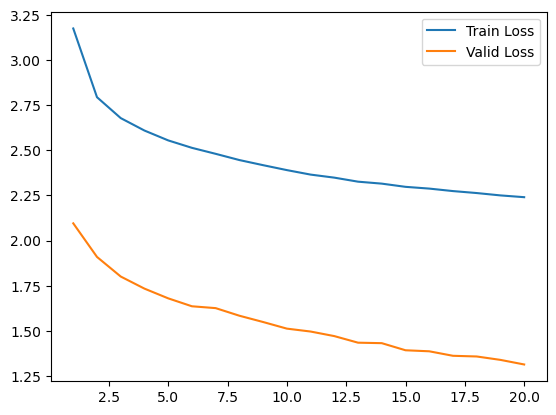

In [17]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1_dropout0.5.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Seems to be more space for improvement, add another layer to the model

    nn.Linear(429, 2048), #1
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),

    nn.Linear(2048, 2048), #2
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),

    nn.Linear(2048, 2048), #3
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),

    nn.Linear(2048, 2048), #4
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),

    nn.Linear(2048, 39), #5
    nn.ReLU(),
    nn.BatchNorm1d(39),
    nn.Dropout(0.5),

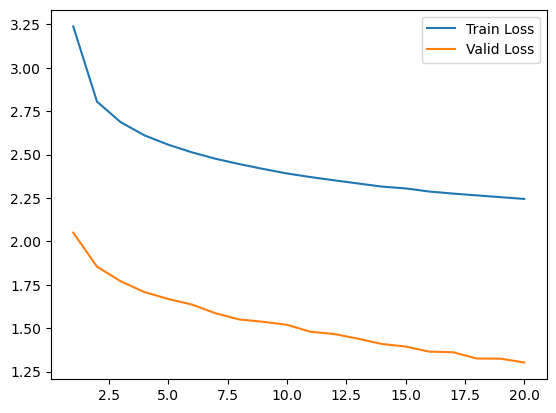

In [18]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model3.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

model1_batch

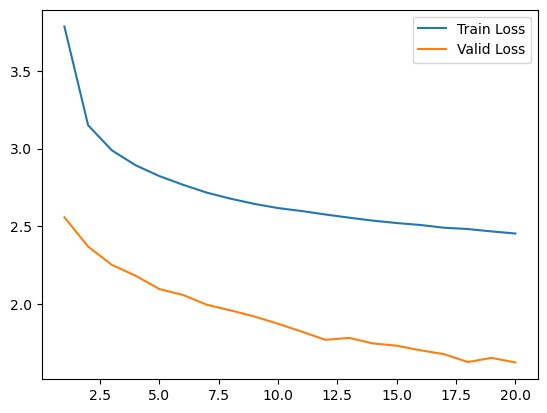

In [23]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1_re.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

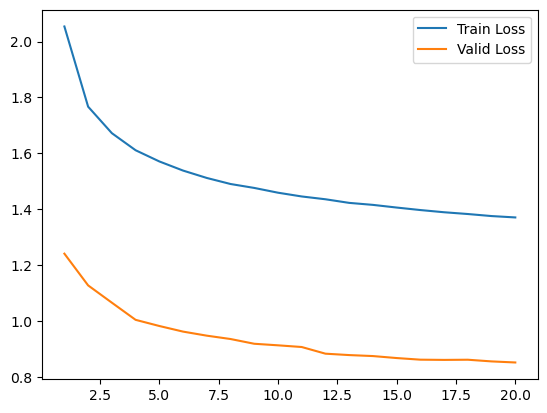

In [24]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\model1_re2.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

Batch = 64 has better performance than Batch = 2048

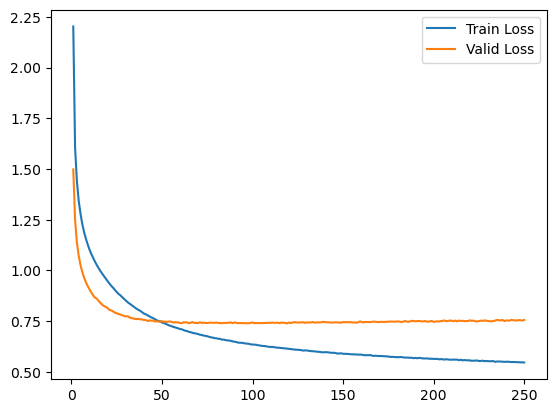

In [3]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\final.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

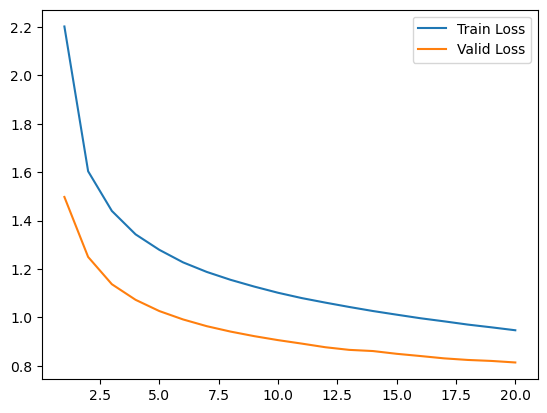

In [4]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\final_epoch20.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()

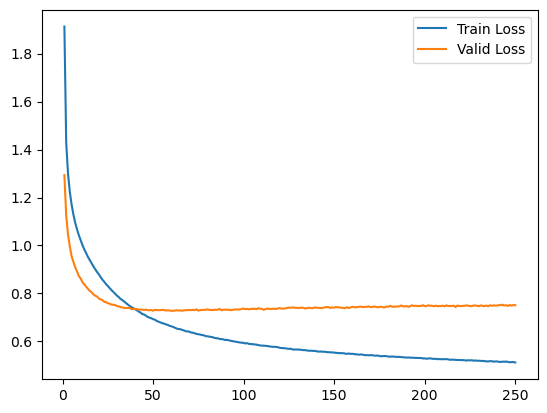

In [5]:
df = pd.read_csv("C:\\Users\\Michael\\Desktop\\PYTHON\\Machine Learning\\HW2\\final_remove1lyr.csv")
plt.plot(df['Epoch'], df['Train_Loss'], label = 'Train Loss')
plt.plot(df['Epoch'], df['Valid_Loss'], label = 'Valid Loss')
plt.legend()
plt.show()